[54.238280819288015, 25.785004287326466]
[60.333169276317186, 31.510688900448653]
[60.660036867311035, 13.296676833746114]
[62.205018765018735, 23.108102109693643]
[59.909799446664515, 5.233268656063462]
Inertia: 268068.8280739264


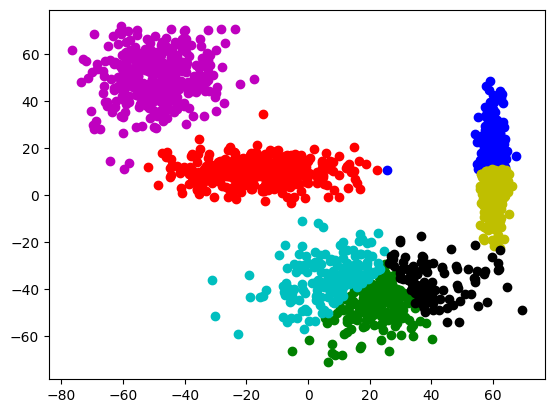

In [2]:
import random
import math
import matplotlib.pyplot as plt
from numpy import genfromtxt

# Set K value
K = 7

# Load dataset into 2D list "Data"
# Assuming Data is a list of 2D points
data_path = 'data.csv'
data = genfromtxt(data_path, delimiter=',')
Data = data.tolist()
for i in range(5):
  print(Data[i])
type(Data)


# Randomly select K different data points from "Data" and store them into 2D list "Centers"
Centers = random.sample(Data, K)

# Initialize a 2D list named "Clusters" which contains K 1D lists for the K centers
Clusters = [[] for i in range(K)]

# for each sample/ data point "S" in "Data":
# identify the center “C_i” that is the closest to “S”
# Append "S" in "i"th list of "Clusters"
for S in Data:
    minDist = math.inf
    minIdx = -1
    for i in range(K):
        dist = math.dist(S, Centers[i])
        if dist < minDist:
            minDist = dist
            minIdx = i
    Clusters[minIdx].append(S)

itr = 1
Shift = 0
while True:
    for i in range(K):
        # Determine the average of the data points. This is the new center of this list.
        if Clusters[i]:
            Centers[i] = [sum(x)/len(Clusters[i]) for x in zip(*Clusters[i])]

    if itr > 1 and Shift < 50:
        break # convergence

    Shift = 0
    Temp_Clusters = [[] for i in range(K)]
    for S in Data:
        minDist = math.inf
        minIdx = -1
        for i in range(K):
            dist = math.dist(S, Centers[i])
            if dist < minDist:
                minDist = dist
                minIdx = i
        Temp_Clusters[minIdx].append(S)

        # if S belongs to different clusters in "Clusters" and "Temp_Clusters" then "Shift" = "Shift" + 1
        if minIdx != [j for j in range(K) if S in Clusters[j]][0]:
            Shift += 1

    # Assign "Temp_Clusters" to "Clusters"
    Clusters = Temp_Clusters
    itr += 1

# Plot the clusters with appropriate color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(K):
    x = [p[0] for p in Clusters[i]]
    y = [p[1] for p in Clusters[i]]
    plt.scatter(x, y, c=colors[i%7])

# "inertia" = 0
inertia = 0
for i in range(K):
    # sum of distances-square of data points of "L" from the center
    inertia += sum([(math.dist(x, Centers[i]) ** 2) for x in Clusters[i]])

print("Inertia:", inertia)

plt.show()
